# Categorical distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create list of color symbols
red_bck = "\x1b[41m%s\x1b[0m"
green_bck = "\x1b[42m%s\x1b[0m"
tan_bck = "\x1b[43m%s\x1b[0m"
blue_bck = "\x1b[44m%s\x1b[0m"
sym = [red_bck%'1', green_bck%'2', tan_bck%'3', blue_bck%'4']
print(sym[0],sym[1],sym[2],sym[3])

1 2 3 4


In [3]:
# The distribution is parametrized by the probabilities assigned to each event
p = [0.0, 0.05, 0.25, 0.25, 0.45]

In [4]:
c = np.cumsum(p)
for i in range(4):
    print('symbol=%s, probability=%5.3f'%(sym[i],p[i+1]))

symbol=1, probability=0.050
symbol=2, probability=0.250
symbol=3, probability=0.250
symbol=4, probability=0.450


**Create an array of random numbers and lenght `n`, distributed uniformly in [0,1]**

In [5]:
n = 5000
R = np.random.rand(n)

**Transform the array `R` into a sequence of symbols, chosen according to the probabilities defined by c (cumul of p)**

In [6]:
def rand2sym(vec):
    ans = []
    counts = {i:0 for i in range(4)}
    for x in vec:
        for i in range(len(c)-1):
            if x >= c[i] and x < c[i+1]:
                ans.append(sym[i])
                counts[i] += 1
                break
                
    return ans,counts

In [7]:
_syms,counts = rand2sym(R)


print(''.join(_syms))

# print counts
f = [float(y)/n for x,y in counts.items()]
print()

# print 'number of trials (n)=',n
for i in range(4):
    print('%s probability=%3.2f frequency= %d/%d = %3.2f '%(sym[i],p[i+1],counts[i],n,f[i]))

4244423444243444422424242323433124243241444421441442434444243122422242434343243433434423333242334443343424334233422224242324323444424424322423443332244412332433223444444442334242333144144224343344233434424433234224232442244123323434444413242444324434222441134422422214142444333444244422432222434442334324442231444432233433343231442224443334444344434342343442244222432424432233433223444432424332413324312444444221324224322344244244134244144233324233244334223134134323233144444334333443343412434411444433424434434242244343444443342342343123343444211343444424442424433344333424123444434244444232344344344443433423431432444434442244322441242224322432124334443444344343342444434342233434123333244334433341424424442312233243232343243423334432344433424432442434424444143122422444224341223424444434424144434432132422244433434434443334444444444324424244443334243444242424422443244343344444443423343343123444434411423242424244433143324342434244422343443242424422412434422442434224314224444244242213143434442232

**Sorting the symbolic random variable**

In [8]:
print(''.join(np.sort(_syms)))

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111122222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222

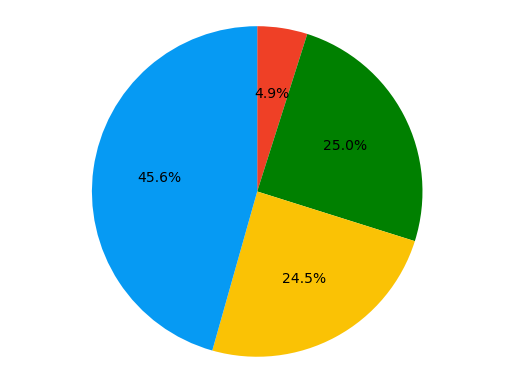

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig, ax = plt.subplots()
ax.pie([f[0], f[1], f[2], f[3]], colors= ['#EF4026', '#008000', '#FAC205', '#069AF3'], autopct='%1.1f%%', startangle=90, counterclock=False)
ax.axis('equal')  

plt.show()

In [10]:
p

[0.0, 0.05, 0.25, 0.25, 0.45]

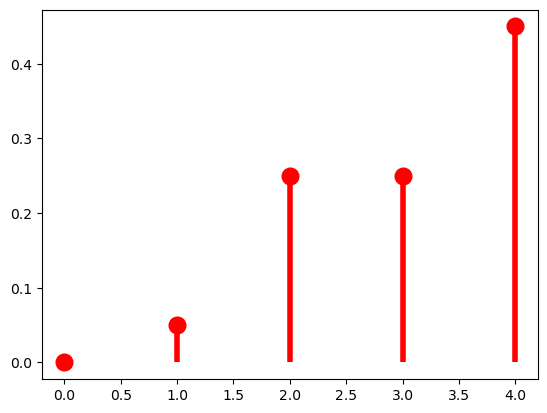

In [12]:
from scipy import stats
xk = np.arange(len(p))
pk = p
custm = stats.rv_discrete(name='custm', values=(xk, pk))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

In [13]:
R = custm.rvs(size=100)